2024-06-14 10:22:55.754940: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-14 10:22:57.858099: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-14 10:22:57.858220: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-14 10:22:58.120192: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-14 10:22:58.696783: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-14 10:22:58.701955: I tensorflow/core/platform/cpu_feature_guard.cc:1

Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2

Linear emulator loaded in memory.
Loading no-wiggles emulator...


/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.22.1 when 

No-wiggles emulator loaded in memory.
Loading non-linear emulator...
Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...


/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Baryonic Emulator loaded in memory.


<IPython.core.display.Javascript object>


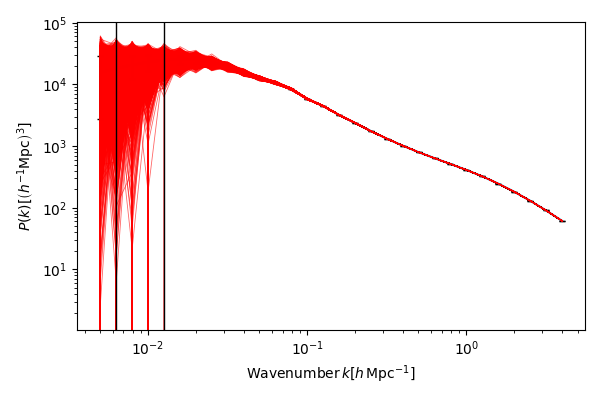

In [1]:
%load_ext autoreload
import os, sys
import numpy as np

%matplotlib notebook
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('default')
plt.close('all')
plt.style.use('tableau-colorblind10')
%config InlineBackend.figure_format = 'retina'

import baccoemu
emulator = baccoemu.Matter_powerspectrum()

# --------------- generate bacco Pk --------------- #

kmin=-2.3
kmax=0.6
N_kk=30
kk = np.logspace(kmin, kmax, num=N_kk)

params = {
    'omega_cold'    :  0.315,
    'sigma8_cold'   :  0.83,
    'omega_baryon'  :  0.05,
    'ns'            :  0.96,
    'hubble'        :  0.67,
    'neutrino_mass' :  0.0,
    'w0'            : -1.0,
    'wa'            :  0.0,
    'expfactor'     :  1,    
    'M_c'           : 13.1, # 9, 15
    'eta'           : 0.,   # -0.7, 0.7
    'beta'          : 0.,   # -1, 0.7
    'M1_z0_cen'     : 13, # 9, 13
    'theta_out'     : 0.,   # -0.5, 0
    'theta_inn'     : -1,   # -2, -0.5
    'M_inn'         : 13.5    # 9, 13.5
}
kk, pk = emulator.get_nonlinear_pk(k=kk, cold=False, baryonic_boost=True, **params)

# --------------- compute approx_pk_gaussian_error --------------- #

def approx_pk_gaussian_error1(kk, delta_kk, pk, box):
    return np.sqrt( (2*np.pi**2) / (box**3 * kk**2 * delta_kk)) * pk

LL = 1000

delta_log10kk = (np.log10(kk[1]) - np.log10(kk[0])) / 2
kk_edges = 10**np.append(np.log10(kk)-delta_log10kk, np.log10(kk[-1])+delta_log10kk)
delta_kk = np.diff(kk_edges)
gauss_err = approx_pk_gaussian_error1(kk, delta_kk, pk, box=LL)

# --------------- generate Pk samples --------------- #

samples_pk = np.random.normal(
    loc=pk,
    scale=gauss_err,
    size=(10000, gauss_err.shape[0])
)

# --------------- plot --------------- #

fig, ax = mpl.pyplot.subplots(1,1,figsize=(6,4))
ax.set_xlabel(r'$\mathrm{Wavenumber}\, k \left[ h\, \mathrm{Mpc}^{-1} \right]$')
ax.set_ylabel(r'$P(k) \left[ \left(h^{-1} \mathrm{Mpc}\right)^{3} \right]$')
ax.set_xscale('log')
ax.set_yscale('log')

ax.plot(kk, pk)
ax.errorbar(kk, pk, yerr=gauss_err, c='k', ls='', capsize=2, alpha=1., elinewidth=1)
ax.plot(kk, samples_pk.T, lw=0.6, alpha=0.6, c='red')

ax.axvline((2*np.pi*1) / LL, c='k', lw=1)
ax.axvline((2*np.pi*2) / LL, c='k', lw=1)

plt.tight_layout()
plt.show()